<a href="https://colab.research.google.com/github/C1air3/C1air3/blob/main/Copy_of_Autoencoder_UMAP_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
cd /content/drive/MyDrive/mail-data/

/content/drive/MyDrive/mail-data


In [ ]:
!ls

apec_prc  loss.png  xubin  z-score-vec.txt


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
X = np.loadtxt("z-score-vec.txt")
X.shape
X = pd.DataFrame(X)


X_tr, X_te = train_test_split(X, test_size=0.2)
train = X_tr
test = X_te
train.shape, test.shape

((81, 61), (21, 61))

In [ ]:
train = train.values
test = test.values
print('训练特征值:\n',train)
train.shape

训练特征值:
 [[ 0.22519581  0.26984354  0.         ... -0.50917508  0.
   0.        ]
 [ 0.22519581  0.26984354  0.         ... -0.50917508  0.
   0.        ]
 [-1.21042749  0.26984354  0.         ...  1.96396101  0.
   0.        ]
 ...
 [ 0.22519581  0.26984354  0.         ... -0.50917508  0.
   0.        ]
 [-0.49261584 -3.40002855  0.         ...  1.96396101  0.
   0.        ]
 [ 0.22519581  0.26984354  0.         ... -0.50917508  0.
   0.        ]]


(81, 61)

In [ ]:
from sklearn.cluster import KMeans
from keras.layers import Input, Dense
from keras.models import Model

train1 = np.reshape(train,train.shape+(1,))
# train1 = np.reshape(train,(train.shape[0],-1))
test1 = np.reshape(test,test.shape+(1,))
# test1 = np.reshape(test,(test.shape[0],-1))
X = X.values
X1 = np.reshape(X,X.shape+(1,))

In [ ]:
train1.shape,test1.shape,X1.shape

((81, 61, 1), (21, 61, 1), (102, 61, 1))

DNN自编码器

In [ ]:
## define the encoder
inputs_dim = train1.shape[1]
encoder = Input(shape = (inputs_dim, ))
e = Dense(32, activation = "relu")(encoder)
e = Dense(16, activation = "relu")(e)
e = Dense(8, activation = "relu")(e)
## bottleneck layer
n_bottleneck = 10
## defining it with a name to extract it later
bottleneck_layer = "bottleneck_layer"
# can also be defined with an activation function, relu for instance
bottleneck = Dense(n_bottleneck, name = bottleneck_layer)(e)
## define the decoder (in reverse)
decoder = Dense(8, activation = "relu")(bottleneck)
decoder = Dense(16, activation = "relu")(decoder)
decoder = Dense(32, activation = "relu")(decoder)
## output layer
output = Dense(inputs_dim)(decoder)
## model
model = Model(inputs = encoder, outputs = output)
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 61)]              0         
_________________________________________________________________
dense (Dense)                (None, 32)                1984      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
bottleneck_layer (Dense)     (None, 10)                90        
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_4 (Dense)              (None, 16)                144   

训练自编码器以细化数据后要使用的模型，使用bottleneck层




In [ ]:
encoder = Model(inputs = model.input, outputs = bottleneck)

In [ ]:
model.compile(loss = "mse", optimizer = "adam")
history = model.fit(
    train1,
    train1,
    batch_size = 8, 
    epochs = 25,
    verbose = 1,
    validation_data = (test1,test1)
)

Epoch 1/25
11/11 [==============================] - 15s 61ms/step - loss: 0.4018 - val_loss: 0.7175
Epoch 2/25
11/11 [==============================] - 0s 4ms/step - loss: 0.4009 - val_loss: 0.7141
Epoch 3/25
11/11 [==============================] - 0s 7ms/step - loss: 0.3982 - val_loss: 0.7073
Epoch 4/25
11/11 [==============================] - 0s 4ms/step - loss: 0.5275 - val_loss: 0.6982
Epoch 5/25
11/11 [==============================] - 0s 5ms/step - loss: 0.3031 - val_loss: 0.6824
Epoch 6/25
11/11 [==============================] - 0s 4ms/step - loss: 0.4671 - val_loss: 0.6560
Epoch 7/25
11/11 [==============================] - 0s 4ms/step - loss: 0.3522 - val_loss: 0.6208
Epoch 8/25
11/11 [==============================] - 0s 4ms/step - loss: 0.2937 - val_loss: 0.5891
Epoch 9/25
11/11 [==============================] - 0s 4ms/step - loss: 0.2938 - val_loss: 0.5675
Epoch 10/25
11/11 [==============================] - 0s 4ms/step - loss: 0.2819 - val_loss: 0.5488
Epoch 11/25
11/11

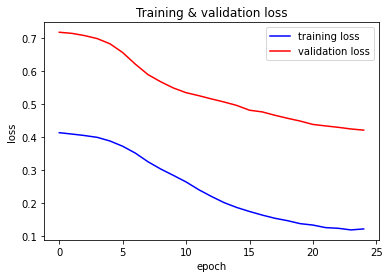

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(25)
myfig = plt.gcf()
plt.plot(epochs, loss_values, "b", label = "training loss")
plt.plot(epochs, val_loss_values, "red", label = "validation loss")
plt.title("Training & validation loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

myfig.savefig("loss.png",dpi=300) 
plt.show()


应用encoder编码器提取特征

In [ ]:
# from keras.utils import plot_model
# plot_model(model, show_shapes=True, to_file='reconstruct_lstm_autoencoder.png')
mail_encoded = encoder.predict(X1)
mail_encoded.shape

(102, 10)

# UMAP

In [ ]:
pip install umap-learn

     |████████████████████████████████| 81kB 8.4MB/s 
     |████████████████████████████████| 1.2MB 36.4MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-cp37-none-any.whl size=76569 sha256=e510a89b126fef2fce9022c50a35bbf859430507c739b617199cbb0c885bc249
  Stored in directory: /root/.cache/pip/wheels/ad/df/d5/a3691296ff779f25cd1cf415a3af954b987fb53111e3392cf4
  Created wheel for pynndescent: filename=pynndescent-0.5.2-cp37-none-any.whl size=51362 sha256=2aa06b01dd50719174589658b62f6a74e25c394330ebf44a77f999b92d053adf
  Stored in directory: /root/.cache/pip/wheels/ba/52/4e/4c28d04d144a28f89e2575fb63628df6e6d49b56c5ddd0c74e
Successfully built umap-learn pynndescent


In [ ]:
# install umap library use
import umap.umap_ as umap
review_umapped = umap.UMAP(n_components = n_bottleneck / 2, 
                           metric = "euclidean",
                           n_neighbors = 50, 
                           min_dist = 0.0,
                           random_state = 13).fit_transform(mail_encoded)
review_umapped.shape
# (25000, 5)

(102, 5)

# DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np
# np.random.seed(13)
# clusters3 = DBSCAN(
#     min_samples = 15,
#     eps = 1
# ).fit_predict(review_umapped)

clusters = DBSCAN(
    min_samples = 15,
    eps = 1
)
clusters2 = clusters.fit(review_umapped)
clusters3 = clusters.fit_predict(review_umapped)
len(set(clusters3))

4

# 输出与画图1 二维


每个样本的簇标号:
[ 0 -1 -1 -1 -1 -1 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2 -1  0  0  0 -1 -1 -1 -1  0
  0  0  0 -1  2  2]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


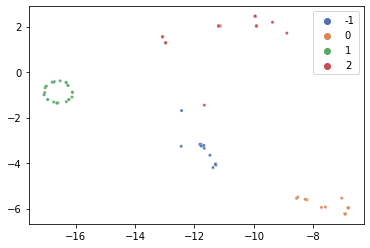

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns

labels = clusters.labels_
print('每个样本的簇标号:')
print(labels)

filepath = '/content/drive/MyDrive/mail-data/'
fig_name = 'testcluter.png'
# fig_path = filepath + '/' + fig_name
fig_path = filepath + fig_name

tsne2 = TSNE(2, metric = "euclidean", random_state = 13).fit_transform(mail_encoded)
fig = sns.scatterplot(tsne2[:, 0], tsne2[:, 1], 
                hue = clusters3, palette = "deep",
                alpha = 0.9, s = 10,
                legend = "full")
scatter_fig = fig.get_figure()
scatter_fig.savefig(fig_path, dpi = 400)

# 输出与画图2（备份方案）图不好看

In [ ]:
core_samples_mask = np.zeros_like(clusters.labels_, dtype=bool)
core_samples_mask[clusters.core_sample_indices_] = True
labels = clusters.labels_
print('每个样本的簇标号:')
print(labels)

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)


# 绘出结果
unique_labels = set(labels)
myfig = plt.gcf()
colors = [plt.cm.Spectral(each)
           for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
     if k == -1:
         col = [0, 0, 0, 1]
     class_member_mask = (labels == k)
     print("class_member_mask is :",class_member_mask)
     xy = X[class_member_mask & core_samples_mask]
     plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
              markeredgecolor='k', markersize=14)
     xy = X[class_member_mask & ~core_samples_mask]
     plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
              markeredgecolor='k', markersize=6)
plt.title('Estimated number of clusters: %d' % n_clusters_)
myfig.savefig("cluster.png",dpi=300)
plt.show()